#Assignment 1:
    test if the distribution of ages is the same for 
    
    1) male and femal riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's

my usual imports and setups

In [2]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats 
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. If you are ambitios you can use data from multiple months, thus addressing systematic errors as well

In [3]:
df=pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201501-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


#BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [4]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

lets splot age in 10 year bins. the dataset is veru large, so i could be plit in smaller bins, but I will chose 10 years in the interest of time. if i was to do this for real the bin size choice is a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

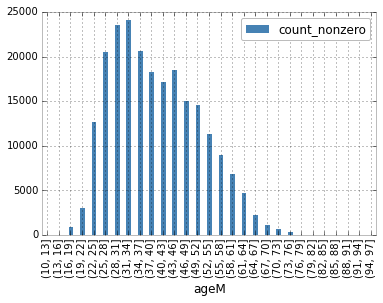

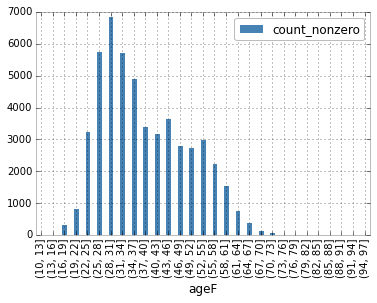

In [7]:
bins = np.arange(10, 99, 3)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

0.0671946856411
0.000177830938792


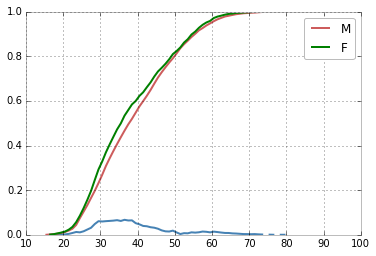

In [18]:
#print df.ageS, df.ageS.cumsum()
#while for plotting bins of 3 are better for visualization i can use finer bins for the test
#the maximum resolution i have is 1 year (i do not know any age to better then 1 year)
bins = np.arange(10, 99, 1)
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

myks = np.abs(csM / csM.max()-csF / csF.max())
pl.plot(bins[:-1]+0.5, myks )
myks=nanmax(myks)
print myks
pl.plot(bins[:-1] + 0.5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 0.5, csF / csF.max(), label = "F")
pl.legend()


they look pretty darn similar! that sets my expectation for the tests to come. if i wanted to code the KS test by hand i woud have everything i need: the normalized cumulative distributions can be subtracted from each other and the max distance can be seeked. 

Notice that there may be Nan values you are gonna have to deal with! you can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [19]:
import scipy.stats

#KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [20]:
ks=scipy.stats.ks_2samp(df.ageM,df.ageF)
print ks
print ""

Ks_2sampResult(statistic=0.61519793242561782, pvalue=0.0)



remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1+n2)}{n1n2}}$

where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

but scipy is already giving you the p-value, so you do not have to worry about it i am still giving you the table FWI and if you ever want to do the coding of the KS test by hand


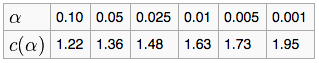

In [21]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="ks2sample_table.png")

"NOT REJECTED: 0.61<1.36"

##the KS statistics again says the NULL that age distribution comes from the same parent distribution cannot be rejected

#Pearson's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [31]:
##NOTE: the test is pairwise, so i have to sorte the ages! 
## we are trying to see if 2 vasiables change in a similar way, so it is intuitive 
## that they should be sorted by the natural scale, in this case age



#r_P = scipy.stats.pearsonr(df.ageM, df.ageF)
# the samples need to be cleaned off nan values and the male sample has unlikely values >90 years which i am remoging
ageMsorted = df.ageM[(~np.isnan(df.ageM)) & ((df.ageM)<90)]
#print ageMsorted[-30:], len(ageMsorted), np.isnan(ageMsorted)

52093
52093
Pearson's r (0.99750541292671735, 0.0)


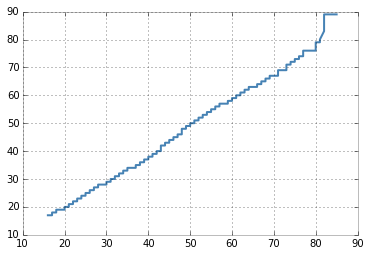

In [57]:
ageFsorted = sorted(df.ageF[~np.isnan(df.ageF)])
print len(ageFsorted)

ageMsorted = sorted(np.random.choice( ageMsorted, len(ageFsorted), replace=False))
pl.plot(ageMsorted, ageFsorted)
print len(ageMsorted)
r_P = scipy.stats.pearsonr(ageMsorted, ageFsorted)
print  "Pearson's r" , r_P

#Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [60]:
r_S = scipy.stats.spearmanr(ageMsorted, ageFsorted)
print  r_S

SpearmanrResult(correlation=0.99915059152749675, pvalue=0.0)


##please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??

The samples haare strongly correlated. the lager number of the Pearson's test indicates  that. However the correlation cannot be quantified numerically with the Pearson's test.

The spearman's correlation test instead returns a p-value, which under some assumptions (and in the case of a large sample, which is the case for us) indicates a negligeble probability (p = 0) that the samples are **not** related



#BY DAY vs NIGHT
splitting the dataset

In [42]:
df['starttime']= pd.to_datetime(df.starttime)
print df['starttime'].dt.hour[0]


0


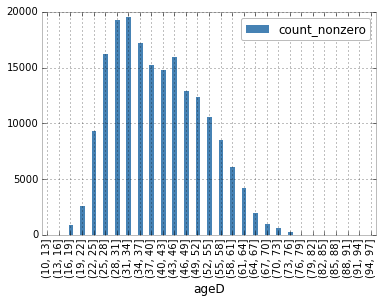

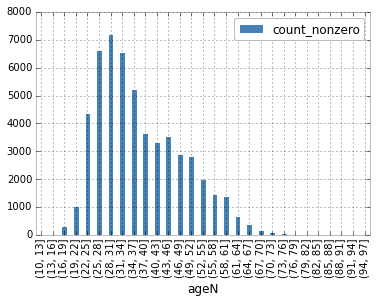

In [44]:
bins = np.arange(10, 99, 3)
#binsize 3 for plotting

#df is the dataframe where the content of the csv file is stored
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['starttime'].dt.hour >6) & (df['starttime'].dt.hour < 18)]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['starttime'].dt.hour <6) | (df['starttime'].dt.hour > 18)]


df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

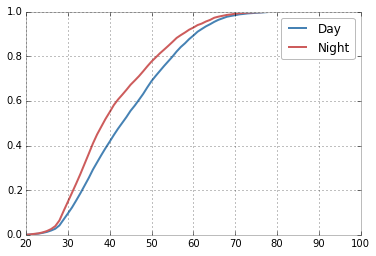

In [45]:
#print df.ageS, df.ageS.cumsum()
bins = np.arange(10, 99, 1)
#binsize 1 for calculation
csD=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

csN=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

myks = nanmax(myks) 
np.abs(csD / csD.max() - csN / csN.max())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.legend()

In [49]:
ks=scipy.stats.ks_2samp(df.ageD,df.ageN)
print ks
print ""

Ks_2sampResult(statistic=0.4813028800358603, pvalue=0.0)



##the KS statistics again says the NULL that age distribution comes from the same parent distribution cannot be rejected (although the statistics is weaker the p value is still 0)

In [65]:
#r_P = scipy.stats.pearsonr(df.ageM, df.ageF)
# the samples need to be cleaned off nan values and the male sample has unlikely values >90 years which i am remoging
ageDsorted = df.ageD[(~np.isnan(df.ageD)) & ((df.ageD)<90)]
ageNsorted = sorted(df.ageN[(~np.isnan(df.ageN)) & ((df.ageN)<90)])
#print ageMsorted[-30:], len(ageMsorted), np.isnan(ageMsorted)

print len(ageNsorted)
print len(ageDsorted)

54102
191450


54102
Pearson's r (0.99388448423761733, 0.0)
SpearmanrResult(correlation=0.99915935737328532, pvalue=0.0)


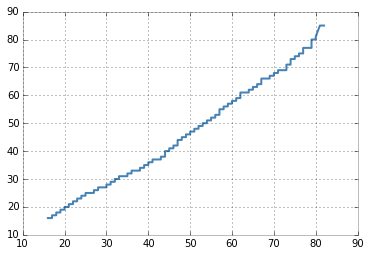

In [66]:
ageDsorted = sorted(np.random.choice( ageDsorted, len(ageNsorted), replace=False))
pl.plot(ageDsorted, ageNsorted)
print len(ageDsorted)
r_P = scipy.stats.pearsonr(ageDsorted, ageNsorted)
print "Pearson's r" , r_P

r_S = scipy.stats.spearmanr(ageNsorted, ageDsorted)
print  r_S



Again Pearson's R and Spearman's test say tha the distribution of ages of night and day riders is not significantly different